In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/devin/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
movies = pd.read_csv("fandango_scores.csv")

In [3]:
%matplotlib inline

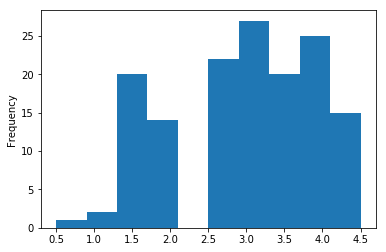

In [4]:
movies["Metacritic_norm_round"].plot.hist()

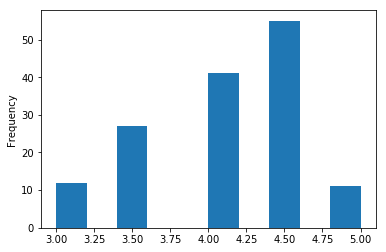

In [5]:
movies["Fandango_Stars"].plot.hist()

The Metacritic data appears to have a negative skew, with scores ranging from 0.5 to 4.5.  In contrast, the Fandango Stars only have a range from 3 - 5.

In [9]:
mc_mean = np.mean(movies["Metacritic_norm_round"])
fd_mean = np.mean(movies["Fandango_Stars"])
print(mc_mean,fd_mean)

2.9726027397260273 4.089041095890411


In [10]:
mc_median = np.median(movies["Metacritic_norm_round"])
fd_median = np.median(movies["Fandango_Stars"])
print(mc_median,fd_median)

3.0 4.0


In [11]:
mc_std = np.std(movies["Metacritic_norm_round"])
fd_std = np.std(movies["Fandango_Stars"])
print(mc_std,fd_std)

0.9875610297038636 0.5385321612699531


Metacritic scores are based on weighted critic reviews and the review scores are normalized.  These scores should be more normal, given the normalization and that movie critics will watch and movies regardless of their level of interest in the film.  Fandango does not directly say how the stars are calculated, however from the website they would have it appear that they are an aggregation of fan ratings.  It could be possible that fandango is altering these ratings, but it could also be possible that people are choosing to go to movies that they believe they will like.  Fandango includes the Rotten Tomatoes score next to their star rating, and even movies with low Rotten Tomatoes scores has a high star rating.  This leads me to believe that since people are choosing these movies despite the Rotten Tomatoes score, it is possible that they are more likely to rate it higher and people who would rate it lower do not attend the movie based on the Rotten Tomatoes score and do not rate the movie either, thus skewing the scores toward higher star ratings.

The mean and median values of each do not differ greatly, implying that there are not many much higher or lower values moving the mean away from the center.  The mean and median values are higher for Fandango because of the narrow range of their scores, The Metacritic median of 3 is the bottom of the Fandango range. Metacritic has a much higher standard deviation, this is due to the wider range of ratings.  Fandango has a lower standard deviation because all the values are between 3 and 5, leaving less room for deviation.

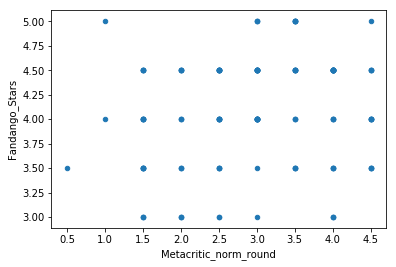

In [45]:
movies.plot.scatter("Metacritic_norm_round","Fandango_Stars")

In [40]:
movies[(movies.Metacritic_norm_round == 1) & (movies.Fandango_Stars == 5)]["FILM"]

3    Do You Believe? (2015)
Name: FILM, dtype: object

In [14]:
movies["fm_diff"] = abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])

In [24]:
biggest_diffs = movies["fm_diff"].sort_values(ascending=False).head(5)

In [29]:
name_big_diff = movies.iloc[biggest_diffs.index]["FILM"]

In [30]:
print(name_big_diff)

3       Do You Believe? (2015)
15              Taken 3 (2015)
134    The Longest Ride (2015)
47                Annie (2014)
19               Pixels (2015)
Name: FILM, dtype: object


In [31]:
from scipy.stats import pearsonr

In [35]:
r, p_val = pearsonr(movies["Metacritic_norm_round"],movies["Fandango_Stars"])

In [36]:
r

0.17844919073895918

There is a very low positive correlation between the two columns.  This might mean that Fandango is inflating the scores, especially of films that would receive lower scores.  I also believe it is possible that the audience generating the reviews for each site are so drastically different that it is causing this lack of correlation.  

In [41]:
from scipy.stats import linregress

In [42]:
slope,intercept,r_val,p_val,stderr_slope = linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])

In [43]:
pred_3 = slope * 3 + intercept

In [44]:
pred_3

4.0917071528212032

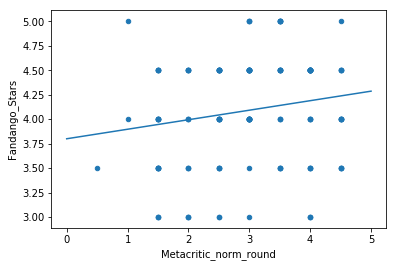

In [52]:
movies.plot.scatter("Metacritic_norm_round","Fandango_Stars")
x = np.arange(0,6,1)
plt.plot(x, slope*x + intercept)